# <b>4. Classification par réseaux de neurones convolutifs</b>

## <b>Partie 2 : Utilisation de réseaux de neurones pré-entraînés</b>

De nombreux modèles pré-entraînés sont disponibles dans Keras et dans Pytorch.  
"Pré-entraînés" signifie qu'un apprentissage avec un dataset connu (ImageNet, VOC, etc) leur a déjà été appliqué.  
A part AlexNet et VGG-16/19, qui utilisent l'architecture de base des réseaux de neurones convolutifs (succession de couches de convolution 2D, pooling, flatten, couches complètement connectées, etc, la plupart de ces modèles utilisent des techniques de réduction du coût de traitement.  

Tous ces modèles peuvent être utilisés comme modèles de base pour un problème donné, tels quels ou avec un complément d'apprentissage.
On va s'intéresser ici à quelques-uns d'entre eux (en Pytorch) :

- AlexNet
- ResNet-18
- MobileNet_v2

Il serait intéressant de comparer les performances de ces modèles sur nos propres données (par exemple GTSRB), du point de vue de la précisioon (accuracy) mais aussi du temps de traitement en inférence.

On a besoin pour ça d'adapter ces modèles à notre nombre de classes.  
C'est possible car ils sont disponibles sous forme de "backbone" (littéralement : colonne vertébrale"), c'est à dire sans les dernières couches complétement connectées, spécifiques au problème traité.  
Il suffit donc de leur ajouter ces couches et de leur appliquer un apprentissage avec nos données.  

https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

On peut déjà regarder quels sont les modèles pré-entraînés dans Pytorch...

In [1]:
from torchvision import models
import torch

dir(models)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


['AlexNet',
 'ConvNeXt',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'VisionTransformer',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'convnext',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 '

### <b>AlexNet</b>

La librairie pytorchvision.models permet de charger des modèles existants pré-entraînés, que l'on peut télécharger.
"Pré-entraîné" signifie que l'apprentissage a déjà été effectué. En l'occurence, ici  l'apprentissage a été fait sur le dataset "Imagenet".
Par exemple, on peut télécharger le modèle AlexNet (qui a gagné la compétition "ImageNet" en 2012, et qui a contribué à l'engouement récent pour le Deep-Learning).

In [2]:
import torch
import torchvision
import torchvision.models
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexNet = torchvision.models.alexnet(pretrained=True).to(device)

alexNet.eval()

print(alexNet)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/jovyan/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

On constate que le modèle est composé de 2 parties distinctes : partie "features" (couches convolutives) et partie "classifieur" (couches complètement connectées).
On peut afficher ces 2 parties séparemment :

In [3]:
print(alexNet.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [4]:
print(alexNet.classifier)

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


On peut savoir si le modèle est chargé sur CPU ou sur GPU :

In [5]:
print(next(alexNet.parameters()).device)

cpu


Il est intéressant de connaître le nombre de paramètres d'un réseau de neurones.  
On peut utiliser la fonction "summary" pour Pytorch, de la librairie PyPI.
La foonction summary a besoin de la dimension des entrées.  
Dans le cas d'AlexNet, les images d'entrée sont en couleur (donc 3 canaux <- profondeur=3) et de taille 256x256.

In [6]:
from torchsummary import summary

summary(alexNet, (3, 256, 256))
#summary(alexNet, (3, 256, 256), device='cpu')        #si problème avec version ci-dessus

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 63, 63]          23,296
|    └─ReLU: 2-2                         [-1, 64, 63, 63]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 31, 31]          --
|    └─Conv2d: 2-4                       [-1, 192, 31, 31]         307,392
|    └─ReLU: 2-5                         [-1, 192, 31, 31]         --
|    └─MaxPool2d: 2-6                    [-1, 192, 15, 15]         --
|    └─Conv2d: 2-7                       [-1, 384, 15, 15]         663,936
|    └─ReLU: 2-8                         [-1, 384, 15, 15]         --
|    └─Conv2d: 2-9                       [-1, 256, 15, 15]         884,992
|    └─ReLU: 2-10                        [-1, 256, 15, 15]         --
|    └─Conv2d: 2-11                      [-1, 256, 15, 15]         590,080
|    └─ReLU: 2-12                        [-1, 256, 15, 15]   

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 256, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 63, 63]          23,296
|    └─ReLU: 2-2                         [-1, 64, 63, 63]          --
|    └─MaxPool2d: 2-3                    [-1, 64, 31, 31]          --
|    └─Conv2d: 2-4                       [-1, 192, 31, 31]         307,392
|    └─ReLU: 2-5                         [-1, 192, 31, 31]         --
|    └─MaxPool2d: 2-6                    [-1, 192, 15, 15]         --
|    └─Conv2d: 2-7                       [-1, 384, 15, 15]         663,936
|    └─ReLU: 2-8                         [-1, 384, 15, 15]         --
|    └─Conv2d: 2-9                       [-1, 256, 15, 15]         884,992
|    └─ReLU: 2-10                        [-1, 256, 15, 15]         --
|    └─Conv2d: 2-11                      [-1, 256, 15, 15]         590,080
|    └─ReLU: 2-12                        [-1, 256, 15, 15]   

Cela confirme qu'il s'agit d'un très gros réseau de neurones. On remarque cependant que la structure est un peu différente du modèle original.

On peut alors tester le modèle sur une image isolée et afficher les classes les plus probables pour cette image.
Il faut pour cela charger le fichier des classes d'ImageNet si on veut savoir à quoi correspondent les sorties du modèle.  
Par exemple ici : https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt

In [7]:
!wget https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt

--2022-11-19 16:03:15--  https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15543 (15K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  15.18K  --.-KB/s    in 0s      

2022-11-19 16:03:16 (34.9 MB/s) - ‘imagenet_classes.txt’ saved [15543/15543]



254, pug 72.44770050048828


[('254, pug', 72.44770050048828),
 ('100, black_swan', 13.93781566619873),
 ('255, Leonberg', 5.874997138977051),
 ('328, sea_urchin', 2.2829737663269043),
 ('275, African_hunting_dog', 1.2450155019760132)]

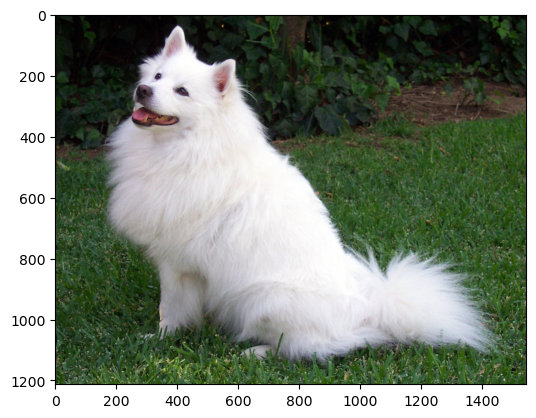

In [8]:
from PIL import Image
from torchvision import transforms

# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

input_image = Image.open(filename)
plt.imshow(input_image)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),   #on centre dans l'image et on coupe une image de 224x224 (la taille d'entrée de AlexNet)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  #create a mini-batch as expected by the model
input_batch = input_batch.to(device)     #il faut mapper les données au format du device (CPU ou GPU)

with torch.no_grad():
    output = alexNet(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
#print(torch.nn.functional.softmax(output[0], dim=0))
with open('imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

#affichage de la classe la plus probable
_, index = torch.max(output, 1)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
print(labels[index[0]], percentage[index[0]].item())

#affichage des 5 classes les plus probables
_, indices = torch.sort(output, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

Rm : attention, ceci est juste un exemple pour montrer comment charger un réseau de neurones existant. AlexNet est un très "gros" réseau de neurones, surdimensionné pour les problèmes de classifications ne comportant pas plus de quelques milliers d'images d'apprentissage.

A ce stade, effacer le (gros) fichier modèle que l'on vient de télécharger est une bonne idée, si l'on n'en a pas besoin dans l'immédiat...

In [9]:
import os

!ls ~/.cache/torch/hub/checkpoints -l
!rm ~/.cache/torch/hub/checkpoints/*.pth

total 238688
-rw------- 1 jovyan users 244408911 Nov 19 16:03 alexnet-owt-7be5be79.pth


### <b>MobileNet V2</b>

Une version pré-entraînée sur le dataset ImageNet est disponible (via l'option "pretrained").

(source : https://pytorch.org/hub/pytorch_vision_mobilenet_v2/)

In [10]:
import torch
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
    
print(torchvision.__version__)
model = models.mobilenet_v2(pretrained=True)

model.eval()

0.12.0


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/jovyan/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

#### <b>Chargement d'une image depuis internet</b>

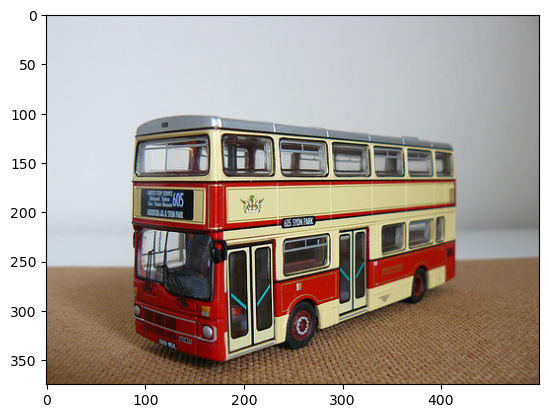

In [11]:
import urllib
from PIL import Image
import matplotlib.pyplot as plt

url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
url, filename = ("https://raw.githubusercontent.com/ajschumacher/imagen/master/imagen/n02924116_16370_bus.jpg", "n02924116_16370_bus.jpg")

try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

image = Image.open(filename)
plt.imshow(image)

#### <b>Application en entrée du modèle</b>

In [12]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_image = Image.open(filename)
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

#with torch.no_grad():
output = model(input_batch)

# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-3.8947e+00, -5.1276e+00,  1.8521e+00, -1.8353e+00, -3.2389e+00,
        -2.0869e+00, -4.1865e+00,  3.7064e-01,  8.1043e-01, -4.2311e-01,
        -1.8939e+00, -9.2656e-01, -2.7819e+00, -4.5326e+00, -7.4857e+00,
        -5.5143e-01, -1.2566e+00, -3.4985e+00, -1.1946e+00, -2.7428e+00,
        -1.9613e+00,  9.7722e-02, -3.5174e+00,  1.3806e+00, -3.6711e-02,
         1.8474e-01,  4.8896e-01, -1.8085e+00, -2.0265e+00, -5.3484e+00,
        -1.2813e+00, -2.5350e+00, -6.7164e-04,  2.3037e+00,  1.2957e+00,
         1.5425e+00,  2.1172e+00,  4.5437e-01, -8.7463e-03,  2.2800e+00,
        -5.3727e-01,  1.2992e+00, -1.3281e-01,  1.7419e+00,  3.9456e-01,
         2.5157e+00,  4.9128e-01, -2.9964e+00, -4.3137e+00, -1.4286e-01,
         1.7376e+00, -2.7386e+00,  6.9201e-01, -7.7804e-01,  9.3756e-01,
        -2.8641e+00,  1.7829e+00,  1.0881e+00,  4.2969e-02, -1.7842e+00,
         1.7627e+00, -1.3887e+00,  1.1846e+00,  5.3094e-01, -2.4074e+00,
         3.0223e+00, -8.7743e-01, -2.6269e-01, -1.7

On a 1000 sorties, correspondant aux 1000 classes de ImageNet.  
Pas facile à interpréter sous cette forme...  
On va rechercher automatiquement la sortie la plus forte ("Top-1 accuracy") et les 5 plus fortes ("Top-5 accuracy").

#### <b>Top-5 accuracy (affichage des 5 classes les plus probables)</b>

Il faut charger le fichier des classes d'ImageNet si on veut savoir à quoi correspondent ces sorties.  

In [13]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-11-19 16:03:32--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-11-19 16:03:32 (39.8 MB/s) - ‘imagenet_classes.txt.1’ saved [10472/10472]



En visualisant le contenu du fichier, on peut constater qu'il s'agit de la version à 1000 classes d'ImageNet.

In [14]:
f = open("imagenet_classes.txt","r")
fichier = f.read()
f.close()

print(fichier)

List of ImageNet class numbers and names as used in Keras' pre-trained models.

Extracted from https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

0, tench
1, goldfish
2, great_white_shark
3, tiger_shark
4, hammerhead
5, electric_ray
6, stingray
7, cock
8, hen
9, ostrich
10, brambling
11, goldfinch
12, house_finch
13, junco
14, indigo_bunting
15, robin
16, bulbul
17, jay
18, magpie
19, chickadee
20, water_ouzel
21, kite
22, bald_eagle
23, vulture
24, great_grey_owl
25, European_fire_salamander
26, common_newt
27, eft
28, spotted_salamander
29, axolotl
30, bullfrog
31, tree_frog
32, tailed_frog
33, loggerhead
34, leatherback_turtle
35, mud_turtle
36, terrapin
37, box_turtle
38, banded_gecko
39, common_iguana
40, American_chameleon
41, whiptail
42, agama
43, frilled_lizard
44, alligator_lizard
45, Gila_monster
46, green_lizard
47, African_chameleon
48, Komodo_dragon
49, African_crocodile
50, American_alligator
51, triceratops
52, thunder_snake
53, ringne

Il faut appliquer la fonction softmax pour transformer ces sorties en probabilités d'appartenance aux classes.

In [15]:
#chargement du fichier des classes ImageNet
with open("imagenet_classes.txt", "r") as f:
    labels = [line.strip() for line in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
print('top-5 probabilités : ', top5_prob)
print('top-5 labels (indices): ', top5_catid)
print('top-5 classes et probabilites : ')
for i in range(top5_prob.size(0)):
    print(labels[top5_catid[i]], top5_prob[i].item())

top-5 probabilités :  tensor([0.9025, 0.0612, 0.0309, 0.0031, 0.0012], grad_fn=<TopkBackward0>)
top-5 labels (indices):  tensor([705, 874, 829, 654, 779])
top-5 classes et probabilites : 
701, parachute 0.9024767279624939
870, tricycle 0.06121053546667099
825, stone_wall 0.030919691547751427
650, microphone 0.003096361178904772
775, sarong 0.0012472380185499787


### <b>Apprentissage par transfert avec GTSRB</b>

On va maintenant adapter un modèle pré-entaîné à notre problème GTSRB.  
On va charger un autre modèle puis lui ajouter au moins une couche de sortie avec un nombre de neurones égal au nombre de nos classes. Pour limiter les durées d'apprentissage, on se limitera à un petit nombre de classes.


#### <b>Chargement du dataset GTSRB</b>

Pour télécharger la base au format ZIP et la décompresser (/!\ inutile sur ROOC) :

In [1]:
#!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

In [2]:
#!unzip -qq GTSRB_Final_Training_Images.zip
#!rm GTSRB_Final_Training_Images.zip

#### <b>Initialisations et affichage de quelques images de la base</b>

In [3]:
import torch, torchvision
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
from torch import nn, optim
from collections import defaultdict
import numpy as np
from glob import glob

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


cpu


In [4]:
train_img_path = 'data/GTSRB/Final_Training/Images/*'

train_folders = sorted(glob(train_img_path))

print(len(train_folders))
print(train_folders)

43
['data/GTSRB/Final_Training/Images/00000', 'data/GTSRB/Final_Training/Images/00001', 'data/GTSRB/Final_Training/Images/00002', 'data/GTSRB/Final_Training/Images/00003', 'data/GTSRB/Final_Training/Images/00004', 'data/GTSRB/Final_Training/Images/00005', 'data/GTSRB/Final_Training/Images/00006', 'data/GTSRB/Final_Training/Images/00007', 'data/GTSRB/Final_Training/Images/00008', 'data/GTSRB/Final_Training/Images/00009', 'data/GTSRB/Final_Training/Images/00010', 'data/GTSRB/Final_Training/Images/00011', 'data/GTSRB/Final_Training/Images/00012', 'data/GTSRB/Final_Training/Images/00013', 'data/GTSRB/Final_Training/Images/00014', 'data/GTSRB/Final_Training/Images/00015', 'data/GTSRB/Final_Training/Images/00016', 'data/GTSRB/Final_Training/Images/00017', 'data/GTSRB/Final_Training/Images/00018', 'data/GTSRB/Final_Training/Images/00019', 'data/GTSRB/Final_Training/Images/00020', 'data/GTSRB/Final_Training/Images/00021', 'data/GTSRB/Final_Training/Images/00022', 'data/GTSRB/Final_Training/Ima

On peut afficher une image pour chaque classe, prise au hasard...

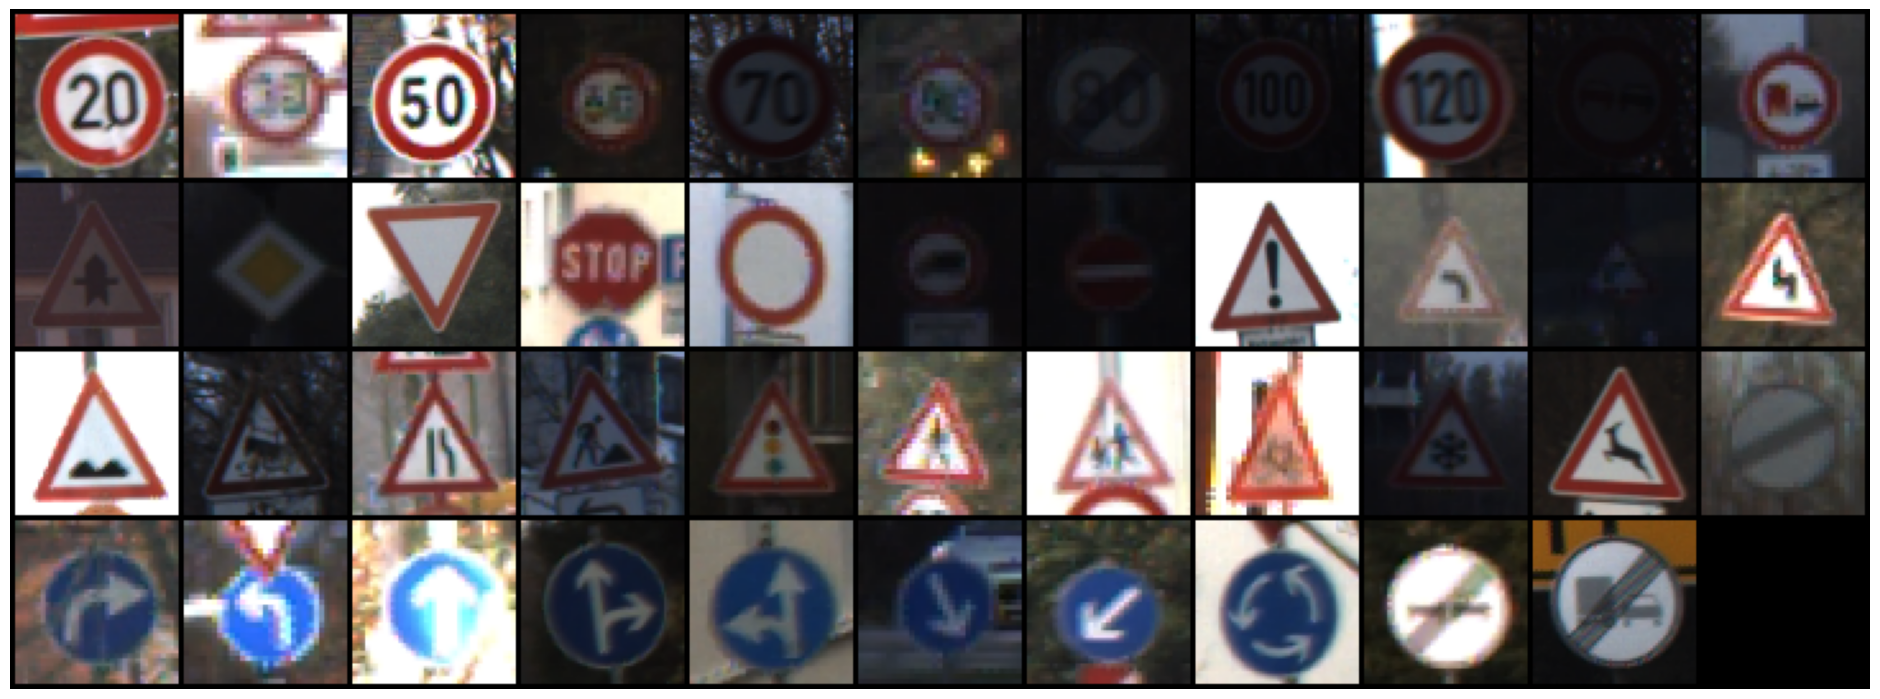

In [7]:
def load_image(img_path, resize=True):
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    if resize:
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
    return img

def show_image(img_path):
    img = load_image(img_path)
    plt.imshow(img)
    plt.axis('off')

def show_sign_grid(image_paths):
    images = [load_image(img) for img in image_paths]
    images = torch.as_tensor(images)
    images = images.permute(0, 3, 1, 2)
    grid_img = torchvision.utils.make_grid(images, nrow=11)
    plt.figure(figsize=(24, 12))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off');
    
sample_images = [np.random.choice(glob(f'{tf}/*ppm')) for tf in train_folders]
show_sign_grid(sample_images)

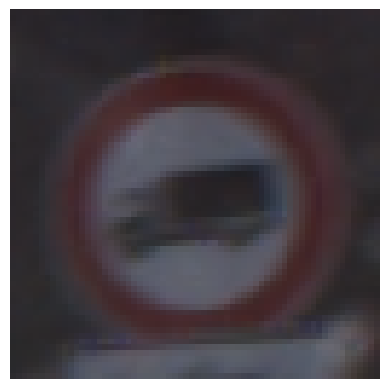

In [8]:
img_path = glob(f'{train_folders[16]}/*ppm')[1]
show_image(img_path)

#### <b>Sélection de quelques classes à apprendre</b>

L'apprentissage risque d'être un peu long avec les 43 classes.  
On va en sélectionner seulement 4, ce qui peut correspondre à un cas réel, où on n'a pas besoin de toutes les classes disponibles dans un dataset.
Pour faciliter l'utilisation les fonctions Pytorch de gestion des datasets (notamment pour pouvoir appliquer des transformations différentes aux images d'apprentissage et aux images de test, on va créer 3 répertoires : "train", "val" et "test".

In [9]:
class_names = ['priority_road', 'give_way', 'stop', 'no_entry']     #classes choisies pour le dataset réduit
class_indices = [12, 13, 14, 17]                                    #nom des répertoires des classes GTSRB

In [10]:
DATA_DIR = Path('my_data/MY_GTSRB/')
DATASETS = ['train', 'val', 'test']
for ds in DATASETS:
    for cls in class_names:
        (DATA_DIR / ds / cls).mkdir(parents=True, exist_ok=True)

Puis on va y copier des images des répertroires originaux : 80% pour l'apprentissage, 10% pour la validation, et 10% pour le test, pour chaque classe.

In [11]:
for i, cls_index in enumerate(class_indices):
    image_paths = np.array(glob(f'{train_folders[cls_index]}/*.ppm'))
    class_name = class_names[i]
    print(f'{class_name}: {len(image_paths)}')
    np.random.shuffle(image_paths)
    ds_split = np.split(image_paths, indices_or_sections=[int(.8*len(image_paths)), int(.9*len(image_paths))])
    dataset_data = zip(DATASETS, ds_split)
    for ds, images in dataset_data:
        for img_path in images:
            shutil.copy(img_path, f'{DATA_DIR}/{ds}/{class_name}/')

priority_road: 2100
give_way: 2160
stop: 780
no_entry: 1110


Comme la base d'apprentissage n'est pas très volumineuse, il est pertinent d'utiliser de l'augmentation de données. On choisit de faire :
- des rotations
- des changements d'échelle (en utilisant les paramètres par défaut)

Il faut aussi normaliser les données pour qu'elles soient à moyenne nulle et à variance égale à 1. C'est requis pour les modèles pré-entraînés de Pytorch.  
Remarque : on pourrait calculer les moyennes et les variances des 3 plans couleurs des images, mais on peut les trouver sur Internet.

In [12]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

transforms = {'train': T.Compose([
                                    T.RandomResizedCrop(size=256),
                                    T.RandomRotation(degrees=15),
                                    #T.RandomHorizontalFlip(),
                                    T.ToTensor(),
                                    T.Normalize(mean_nums, std_nums)
                                ]), 
                'val': T.Compose([
                                    T.Resize(size=256),
                                    T.CenterCrop(size=224),
                                    T.ToTensor(),
                                    T.Normalize(mean_nums, std_nums)
                                ]), 
                'test': T.Compose([
                                    T.Resize(size=256),
                                    T.CenterCrop(size=224),
                                    T.ToTensor(),
                                    T.Normalize(mean_nums, std_nums)
                                ]),
}

On crée un DataLoader pour chacun des 3 datasets.

In [13]:
image_datasets = {
    d: ImageFolder(f'{DATA_DIR}/{d}', transforms[d]) for d in DATASETS
}

data_loaders = {
    d: DataLoader(image_datasets[d], batch_size=4, shuffle=True, num_workers=4)
    for d in DATASETS
}

On mémorise le nombre d'exemple de chaque dataset et leur nom, pour une utilisation ultérieure.

In [14]:
dataset_sizes = {d: len(image_datasets[d]) for d in DATASETS}
class_names = image_datasets['train'].classes
print(class_names)
print(dataset_sizes)

['give_way', 'no_entry', 'priority_road', 'stop']
{'train': 5903, 'val': 1162, 'test': 1164}


On peut remarquer que l'ordre des classes est changé par rapport à l'ordre initial.  
C'est normal, avec les noms de classes comme noms de répertoires, les classes seront chargées par ordre alphabétique.  
On peut visualiser quelques images résultant de ces transformations.  
Mais il faut d'abord inverser la normalisation et ré-ordonner les canaux de couleur pour retrouver une image correcte.

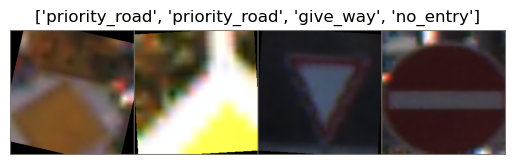

In [15]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([mean_nums])
    std = np.array([std_nums])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

inputs, classes = next(iter(data_loaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

#### <b>Définition du modèle spécifique à nos classes, à partir d'un modèle ResNet pré-entraîné</b>

On télécharge un modèle pré-entraîné de type ResNet, auquel on ajoute une couche de neurones complètement connectée, pour la classification adaptée à nos classes.  
On prend le resnet le plus léger de Pytorch (ResNet-18) pour voir déjà ce que ça donne.

In [16]:
n_classes = len(class_names)

model = models.resnet18(pretrained=True)

#for param in model.parameters():
#    param.requires_grad = False                #gel de tous les poids du réseau pré-entraîné

#il faut au minimum une couche de sortie complètement connectée, avec un neurone par classe
model.fc = nn.Linear(model.fc.in_features, n_classes)

"""
#si on veut ajouter d'autres couches, on utilise la fonction Sequential()
#on peut alors mettre la succession des couches à l'intérieur
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, n_classes),
)
"""
base_model = model.to(device)

print(base_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### <b>Fonctions d'apprentissage et de validation, et boucle d'apprentissage</b>

On définit une fonction d'apprentissage :

In [17]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    cpt = 0
    for inputs, labels in data_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, labels)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if cpt % 100 == 0:
            print('Data: {}/{}\tTrain_loss: {:.6f}'.format(cpt*len(inputs), len(data_loader.dataset), loss.item()))
        cpt = cpt + 1
    return correct_predictions.double() / n_examples, np.mean(losses)

puis une fonction d'évaluation :

In [18]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, labels)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
    return correct_predictions.double() / n_examples, np.mean(losses)

et la fonction générale d'apprentissage, faisant appel aux deux précédentes.

In [19]:
def train_model(model, data_loaders, dataset_sizes, device, n_epochs=3):
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    loss_fn = nn.CrossEntropyLoss().to(device)
    history = defaultdict(list)
    best_accuracy = 0
    for epoch in range(n_epochs):
        print(f'Epoch {epoch + 1}/{n_epochs}')
        print('-' * 10)
        train_acc, train_loss = train_epoch(model, data_loaders['train'], loss_fn, optimizer, device, dataset_sizes['train'])
        print(f'Train loss {train_loss} accuracy {train_acc}')
        val_acc, val_loss = eval_model(model, data_loaders['val'], loss_fn, device, dataset_sizes['val'])
        print(f'Val loss {val_loss} accuracy {val_acc}')
        print()
        history['train_acc'].append(train_acc.item())
        history['train_loss'].append(train_loss)
        history['val_acc'].append(val_acc.item())
        history['val_loss'].append(val_loss)
        if val_acc > best_accuracy:
            torch.save(model.state_dict(), 'best_model_state.pt')
            best_accuracy = val_acc
    print(f'Best val accuracy: {best_accuracy}')
    model.load_state_dict(torch.load('best_model_state.pt'))
    return model, history

L'apprentissage peut alors être effectué.

Attention, il s'agit d'un gros modèle donc l'apprentissage peut prendre beaucoup de temps sur CPU.
On se limite ici à un petit nombre d'épisodes.

In [ ]:
base_model, history = train_model(base_model, data_loaders, dataset_sizes, device, n_epochs=5)

Epoch 1/5
----------


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Data: 0/5903	Train_loss: 1.388191
Data: 400/5903	Train_loss: 0.142514
Data: 800/5903	Train_loss: 0.054749


On constate que 100% des données de validation sont bien reconnues au bout de quelques épisodes d'apprentissage seulement...  
Une fois l'apprentissage terminé, on peut afficher l'historique des losses et des accuracies :

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(history['train_loss'], label='train loss')
    ax1.plot(history['val_loss'], label='validation loss')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax2.plot(history['train_acc'], label='train accuracy')
    ax2.plot(history['val_acc'], label='validation accuracy')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.set_ylim([-0.05, 1.05])
    ax2.legend()
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    fig.suptitle('Training history')

#history2 = torch.load('history.bin', map_location=torch.device('cpu')))    # chargement de l'historique de l'apprentissage

plot_training_history(history)

On peut constater que les données de test sont reconnues à 100%.  
On peut ensuite appliquer notre nouveau modèle à n'importe quelle image en entrée...

#### <b>Utilisation ultérieure</b>

In [1]:
import torch, torchvision
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
from torch import nn, optim
from collections import defaultdict
import numpy as np
from glob import glob

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#/!\ on reprend les noms des classes du dataset réduit, par ordre alphabétique (=l'ordre dans lequel les données seront chargées par la dataloader)
class_names = ['give_way', 'no_entry', 'priority_road', 'stop']

n_classes = len(class_names)

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, n_classes)

print(model)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


cpu
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

On charge le fichier-modèle généré pendant l'apprentissage (qui est le meilleur obtenu, c'est à dire correspondant au loss minimal).

In [2]:
model.load_state_dict(torch.load('best_model_state.pt', map_location=torch.device('cpu')))    # chargement du modèle

model.eval()

base_model = model.to(device)

print(base_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

On peut maintenant appliquer une image en entrée de notre modèle.
On commence par récupérer une image comportant un panneau, quelque soit sa position. Il suffira de le découper avant de la présenter entrée du modèle.

In [3]:
!wget https://www.techno-science.net/illustration/Definition/220px/Panneau-STOP-en-bord-de-piste-cyclable.JPG
!cp Panneau-STOP-en-bord-de-piste-cyclable.JPG test.jpg

--2022-11-21 18:03:05--  https://www.techno-science.net/illustration/Definition/220px/Panneau-STOP-en-bord-de-piste-cyclable.JPG
Resolving www.techno-science.net (www.techno-science.net)... 194.163.136.68
Connecting to www.techno-science.net (www.techno-science.net)|194.163.136.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12015 (12K) [image/jpeg]
Saving to: ‘Panneau-STOP-en-bord-de-piste-cyclable.JPG’

Panneau-STOP-en-bor 100%[===================>]  11.73K  --.-KB/s    in 0s      

2022-11-21 18:03:05 (156 MB/s) - ‘Panneau-STOP-en-bord-de-piste-cyclable.JPG’ saved [12015/12015]



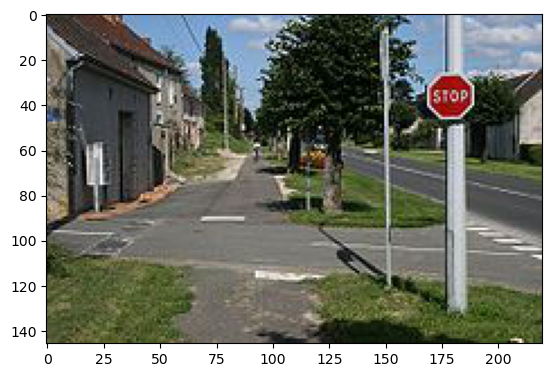

In [4]:
img = Image.open('test.jpg')
plt.imshow(img)

On découpe "manuellement" la zone de l'image contenant le panneau à reconnaître.

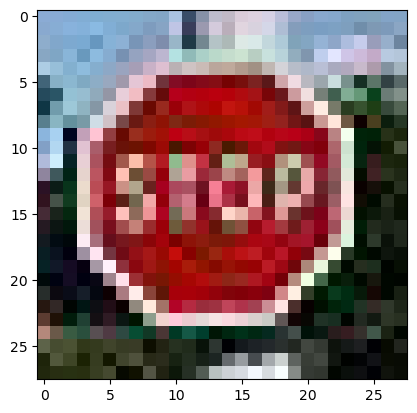

In [5]:
x, y, l, h = 166, 23, 28, 28
img_crop = img.crop((x, y, x+l, y+h)) 
plt.imshow(img_crop)

Il reste à appliquer cette image en entrée du modèle, en lui appliquant les transformations adéquates pour les images de test, déjà définies plus haut.

In [6]:
import pandas as pd
import seaborn as sns

mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

transforms = {'test': T.Compose([
                                    T.Resize(size=256),
                                    T.CenterCrop(size=224),
                                    T.ToTensor(),
                                    T.Normalize(mean_nums, std_nums)
                                ]),
}

def predict_proba(model, img):
    img = img.convert('RGB')
    img = transforms['test'](img).unsqueeze(0)
    pred = model(img.to(device))
    pred = torch.nn.functional.softmax(pred, dim=1)
    return pred.detach().cpu().numpy().flatten()

pred = predict_proba(base_model, img_crop)

print(pred)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


[9.9800800e-06 1.8364696e-04 1.3524853e-05 9.9979287e-01]


On peut utiliser la fonction "barplot" de la librairie Seaborn pour afficher les résultats graphiquement :

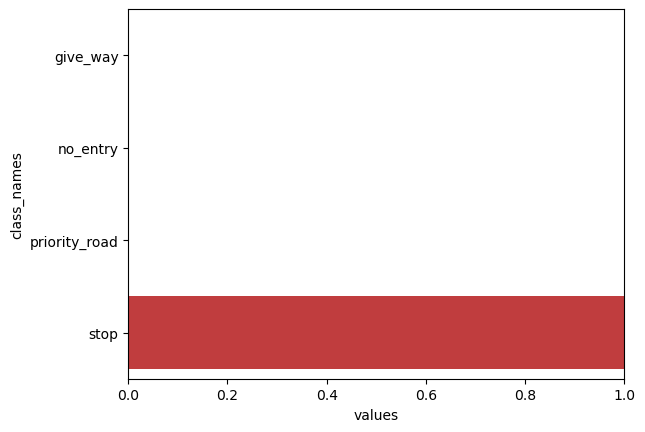

In [7]:
def show_prediction_confidence(prediction, class_names):
    pred_df = pd.DataFrame({'class_names': class_names, 'values': prediction})
    sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
    plt.xlim([0, 1]);

show_prediction_confidence(pred, class_names)

### <b>Exercice 4.4</b>

Essayer d'obtenir les meilleurs résultats possibles, avec un modèle pré-entraîné de type ResNet, pour les 4 classes suivantes de GTSRB :
- limitation à 30km/h
- limitation à 50km/h
- stop
- sens interdit

Ca donne un problème de classification intéressant car les 2 premières classes se ressemblent, et les 2 dernières ont également des points communs.  
Il suffit de reprendre ce qui a déjà été fait plus haut, mais en changeant les indices des classes qu'on peut repèrer à partir des répertoires des images).  

- Essayer d'obtenir une précision de 100% (quitte à ajouter une couche cachée de neurones).  
- Tester le modèle avec au moins une image de chaque classe récupérée sur Internet (découpée à partir d'une image réelle comme dans l'exemple plus haut).

Le code nécessaire devra être donné dans <b>une seule cellule</b>, et devra fonctionner même après un redémarrage du kernel.  

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


cpu
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


[1.8918061e-05 3.0676587e-04 1.3500595e-05 9.9966085e-01]


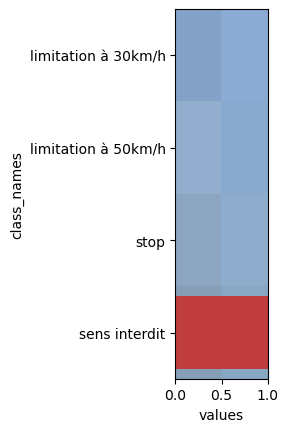

In [1]:
import torch, torchvision
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
from torch import nn, optim
from collections import defaultdict
import numpy as np
from glob import glob
import pandas as pd
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

class_names = ['limitation à 30km/h', 'limitation à 50km/h', 'stop', 'sens interdit']     #classes choisies pour le dataset réduit
class_indices = [1, 2, 14, 17]    
n_classes = len(class_names)        

model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, n_classes)

print(model)

model.load_state_dict(torch.load('best_model_state.pt', map_location=torch.device('cpu')))    # chargement du modèle

model.eval()

base_model = model.to(device)

print(base_model)

!wget https://www.techno-science.net/illustration/Definition/220px/Panneau-STOP-en-bord-de-piste-cyclable.JPG
!cp Panneau-STOP-en-bord-de-piste-cyclable.JPG test.jpg

img = Image.open('test.jpg')
plt.imshow(img)

x, y, l, h = 165, 23, 30, 30
img_crop = img.crop((x, y, x+l, y+h)) 
plt.imshow(img_crop)



mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

transforms = {'test': T.Compose([
                                    T.Resize(size=256),
                                    T.CenterCrop(size=224),
                                    T.ToTensor(),
                                    T.Normalize(mean_nums, std_nums)
                                ]),
}

def predict_proba(model, img):
    img = img.convert('RGB')
    img = transforms['test'](img).unsqueeze(0)
    pred = model(img.to(device))
    pred = torch.nn.functional.softmax(pred, dim=1)
    return pred.detach().cpu().numpy().flatten()

pred = predict_proba(base_model, img_crop)

print(pred)

def show_prediction_confidence(prediction, class_names):
    pred_df = pd.DataFrame({'class_names': class_names, 'values': prediction})
    sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
    plt.xlim([0, 1]);

show_prediction_confidence(pred, class_names)

#### <b>Explication du code et interprétation des résultats</b>

...   
...   
...      



## <b>Références</b>

- Image processing with numpy :
https://pythoninformer.com/python-libraries/numpy/numpy-and-images/
- Convolutional Neural Networks : 
https://www.cs.toronto.edu/~lczhang/360/lec/w04/convnet.html 
- PyTorch tutorials : 
https://github.com/pytorch/examples/tree/master/mnist
- Basic PyTorch operations :
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789534092/1/ch01lvl1sec11/installing-pytorch
- MNIST Handwritten Digit Recognition in PyTorch :
https://nextjournal.com/gkoehler/pytorch-mnist
- PyTorch for Beginners: Image Classification using Pre-trained models : 
https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
- PyTorch pretrained models (AlexNet example) : 
https://pytorch.org/hub/pytorch_vision_alexnet/
- Transfert learning for image classification
https://curiousily.com/posts/transfer-learning-for-image-classification-using-torchvision-pytorch-and-python/
- Pytorch classification tutorial (CIFAR images) :
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- Face Recognition project in PyTorch using CNNs :
https://github.com/apsdehal/Face-Recognition
- Image classification with PyTorch
https://www.pluralsight.com/guides/image-classification-with-pytorch
- How to Train an Image Classifier in PyTorch and use it to Perform Basic Inference on Single Image :
https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5
- Saving and Loading Models in PyTorch :
https://github.com/pytorch/tutorials/blob/master/beginner_source/saving_loading_models.py